In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from module.util.logger_conf import logger
from module.conf import PROJECT_DIR
from datetime import datetime as dt

In [66]:
df1 = pd.read_csv("".join([PROJECT_DIR, "/data/csv/brazil-real-estate-1.csv"]))
df2 = pd.read_csv("".join([PROJECT_DIR, "/data/csv/brazil-real-estate-2.csv"]))

In [69]:
df1

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"
...,...,...,...,...,...,...
12829,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.056418,-34.909309",91.0,"$174,748.79"
12830,apartment,|Brasil|Pernambuco|Recife|,Northeast,"-8.1373477,-34.909181",115.0,"$115,459.02"
12831,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,"-8.1136717,-34.896252",76.0,"$137,302.62"
12832,apartment,|Brasil|Pernambuco|Recife|Boa Viagem|,Northeast,NaN,130.0,"$234,038.56"


In [70]:
df2

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36
...,...,...,...,...,...,...,...
12828,house,São Paulo,Southeast,-23.587495,-46.559401,250.0,429194.89
12829,apartment,São Paulo,Southeast,-23.522029,-46.189290,55.0,252398.80
12830,apartment,São Paulo,Southeast,-23.526443,-46.529182,57.0,319400.84
12831,house,Tocantins,North,-8.848399,-48.511164,NaN,529007.65


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


In [72]:
df1.dropna(inplace=True)

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


In [74]:
df1['price_usd'] = df1['price_usd'].str.replace('$', '', regex = False)
df1['price_usd'] = df1['price_usd'].str.replace(',', '', regex = False)
df1['price_usd'] = df1['price_usd'].astype(float) 
df1['price_usd']

0        187230.85
1         81133.37
2        154465.45
3        146013.20
4        101416.71
           ...    
12828    134182.11
12829    174748.79
12830    115459.02
12831    137302.62
12833    168507.77
Name: price_usd, Length: 11551, dtype: float64

In [94]:
df2.dropna(inplace=True)
df2.info()
df2.reset_index(inplace=True)
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11293 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      11293 non-null  float64
dtypes: float64(4), object(3)
memory usage: 705.8+ KB


,index,property_type,state,region,lat,lon,area_m2,price_brl
0,0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36
...,...,...,...,...,...,...,...,...
11288,12827,house,São Paulo,Southeast,-23.595098,-46.796448,180.0,419213.60
11289,12828,house,São Paulo,Southeast,-23.587495,-46.559401,250.0,429194.89
11290,12829,apartment,São Paulo,Southeast,-23.522029,-46.189290,55.0,252398.80
11291,12830,apartment,São Paulo,Southeast,-23.526443,-46.529182,57.0,319400.84


In [76]:
import plotly.express as px

In [77]:
fig = px.scatter_mapbox(
    data_frame = df2,
    lat = df2['lat'],
    lon = df2['lon'],
    center = {"lat": -23.6, "lon": -46.5},
    width = 600,
    height = 600,
    hover_data = ['price_brl']
)
fig.update_layout(mapbox_style = "open-street-map")
fig.show()

Text(0.5, 1.0, 'Price vs Area')

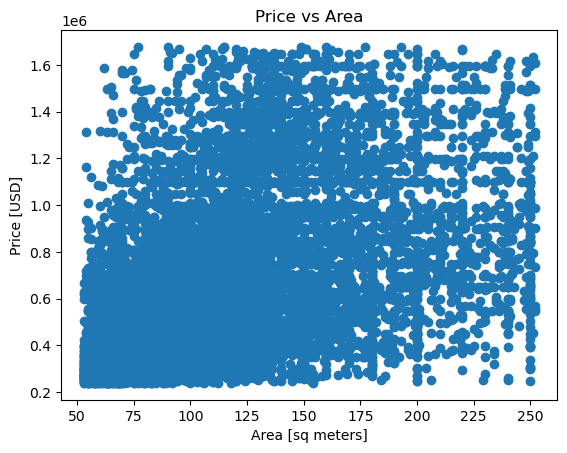

In [78]:
plt.scatter(x = df2['area_m2'], y = df2['price_brl'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price vs Area')

In [82]:
p_correlation = df2['area_m2'].corr(df2['price_brl'])
p_correlation

0.49261832542886336

In [83]:
df_saopaulo = df2[df2['state'] == 'São Paulo']

Text(0.5, 1.0, 'Price vs Area')

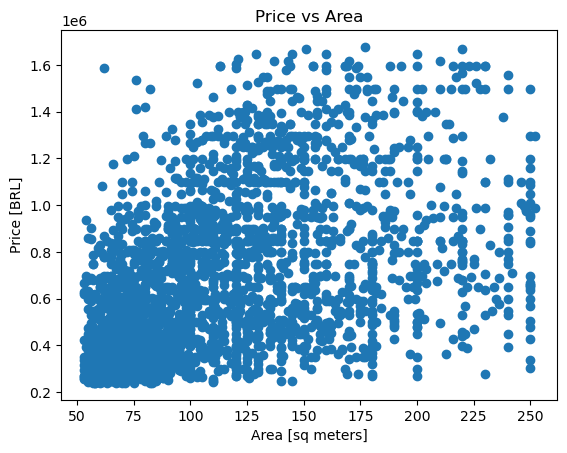

In [84]:
plt.scatter(x = df_saopaulo['area_m2'], y = df_saopaulo['price_brl'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [BRL]')
plt.title('Price vs Area')

In [86]:
p_correlation = df_saopaulo['area_m2'].corr(df_saopaulo['price_brl'])
print(p_correlation)

0.47712889121748514


Text(0.5, 1.0, 'Price vs Area')

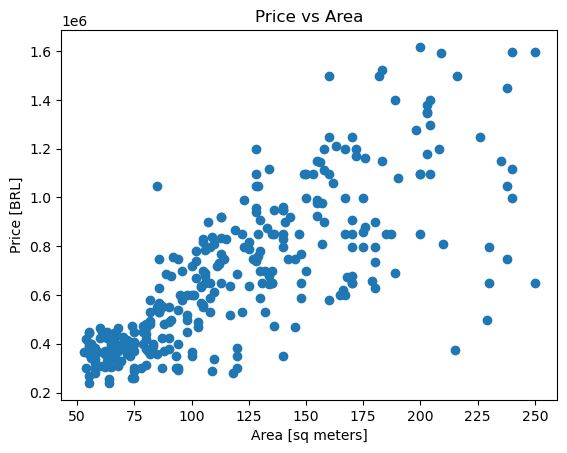

In [87]:
df_pernambuco = df2[df2['state'] == 'Pernambuco']
plt.scatter(x = df_pernambuco['area_m2'], y = df_pernambuco['price_brl'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [BRL]')
plt.title('Price vs Area')

In [90]:
df_pernambuco['area_m2'].corr(df_pernambuco['price_brl'])

0.7794779093888593

In [91]:
df_pernambuco['price_brl'].corr(df_pernambuco['area_m2'])

0.7794779093888593